# Lista de Exercícios 2 - Modelagem e Simulação

> Guilherme Alves Carvalho - 11921BCC016

## Imports

In [3]:
import numpy as np
from matplotlib import pyplot as plt

## Exercício 2

In [12]:
def spa(lamb=1, m1=3, m2=2, pri_valor=0, tentativas_max=10**5):

    inter = 0
    tentativas = [0] 
    n_casos = [pri_valor]
    quantidade_pessoas = 0
    quantidades = [0]

    while tentativas[-1] < tentativas_max:
        if (n_casos[-1] == 0):
            inter = np.random.exponential(1/lamb)
            n_casos.append(1)
            quantidade_pessoas += 1
        elif (n_casos[-1] == 1):
            inter = np.random.exponential(1/m1)
            n_casos.append(2)
        elif (n_casos[-1] == 2):
            inter = np.random.exponential(1/(m2+lamb))
            if (np.random.random() < (lamb/(m2+lamb))):
                n_casos.append(3)
                quantidade_pessoas += 1
            else:
                n_casos.append(0)
                quantidade_pessoas -= 1
        elif (n_casos[-1] == 3):
            inter = np.random.exponential(1/(m2+m1))
            if (np.random.random() < (m1/(m2+m1))):
                n_casos.append(4)
            else:
                n_casos.append(1)
                quantidade_pessoas -= 1
        elif (n_casos[-1] == 4):
            inter = np.random.exponential(1/m2)
            n_casos.append(2)
            quantidade_pessoas -= 1

        quantidades.append(quantidade_pessoas)
        tentativas.append(tentativas[-1] + inter)

    return tentativas, quantidades

### A

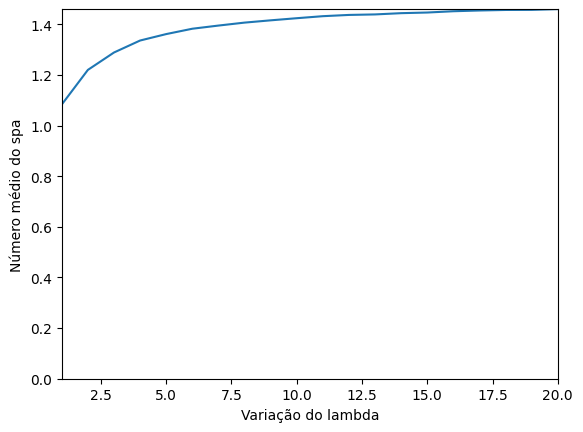

In [13]:
def numero_medio_a(lambd, m1=1, m2=1, primeiro_valor=0, tentativas_max=10**5):
    lista = [i for i in range(1, lambd+1)]
    fila_lista = []

    for l in lista:
        spa_um = spa(l, m1, m2, primeiro_valor, tentativas_max)[1]
        fila_lista.append(np.mean(spa_um))

    return lista, fila_lista


xs, ys = numero_medio_a(20)

fig, ax = plt.subplots()
ax.plot(xs, ys)
plt.ylabel("Número médio do spa")
plt.xlabel("Variação do lambda")
ax.set(xlim=(min(xs), max(xs)), ylim=(0, max(ys)))
plt.show()

### B

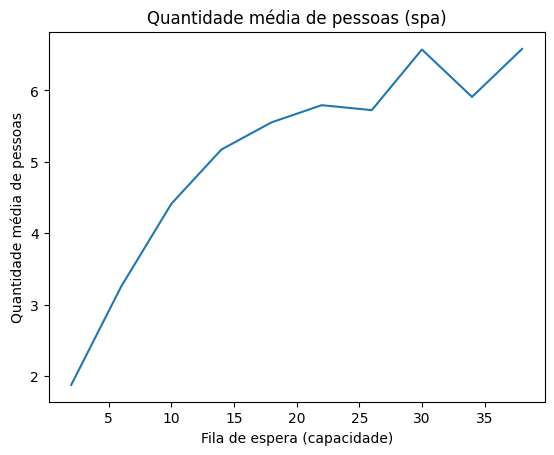

In [17]:
def spa_simulada(lambd, m1, m2, primeiro_val=0, e=5, tent_max=10**5):

    inter = 0             
    tentativas = [0]                   
    n_casos = [primeiro_val]                  
    quantidade_pessoas = 0           
    vetor_pessoas = []        
    quantidade_pessoas_espera = 0    
    quantidade_pessoas_atendidas = 0 

    while tentativas[-1] < tent_max:
        if (n_casos[-1] == 0):
            inter = np.random.exponential(1/lambd)
            quantidade_pessoas += 1
            n_casos.append(1)

        elif (n_casos[-1] == 1):
            inter = np.random.exponential(1/(m1+lambd))
            if np.random.random() < m1/(m1+lambd):
                if quantidade_pessoas_espera == 0:
                    n_casos.append(2)
                else:
                    quantidade_pessoas_espera -= 1
                    quantidade_pessoas += 1
                    n_casos.append(3)
            else:
                if quantidade_pessoas_espera < e:
                    quantidade_pessoas_espera += 1
        elif (n_casos[-1] == 2):
            inter = np.random.exponential(1/(m2+lambd))
            if (np.random.random() < (lambd/(m2+lambd))):
                n_casos.append(3)
                quantidade_pessoas += 1
            else:
                n_casos.append(0)
                quantidade_pessoas -= 1
                quantidade_pessoas_atendidas += 1

        elif (n_casos[-1] == 3):
            inter = np.random.exponential(1/(m2+m1+lambd))
            if np.random.random() < lambd/(m1+lambd):
                if quantidade_pessoas_espera < e:
                    quantidade_pessoas_espera += 1
            elif (np.random.random() < (m1/(m2+m1))):
                n_casos.append(4)
            else:
                n_casos.append(1)
                quantidade_pessoas -= 1
                quantidade_pessoas_atendidas += 1

        elif (n_casos[-1] == 4):
            inter = np.random.exponential(1/(m2+lambd))
            if np.random.random() < m2/(m2+lambd):
                n_casos.append(2)
                quantidade_pessoas -= 1
                quantidade_pessoas_atendidas += 1
            else:
                if quantidade_pessoas_espera < e:
                    quantidade_pessoas_espera += 1

        tentativas.append(tentativas[-1] + inter)
        vetor_pessoas.append(quantidade_pessoas+quantidade_pessoas_espera)

    return vetor_pessoas, tentativas[-1], quantidade_pessoas_atendidas


EXECS = 10**5
lista_limite_fila = [l for l in range(2, 41, 4)]
lista_A_medio = []
lista_B_medio = []

for limite in lista_limite_fila:
    pessoas, tempo, quantidade_atendida = spa_simulada(
        lambd=0.8, m1=3,
        m2=2,
        primeiro_val=0, e=limite,
        tent_max=EXECS)

    media_A = np.mean(pessoas)
    media_W = (tempo*media_A) / quantidade_atendida

    lista_A_medio.append(media_A)
    lista_B_medio.append(media_W)

fig, ax = plt.subplots()
ax.plot(lista_limite_fila, lista_A_medio)
plt.xlabel(f'Fila de espera (capacidade)')
plt.ylabel('Quantidade média de pessoas')
plt.title('Quantidade média de pessoas (spa)')
plt.show()

## Exercício 3

In [48]:
def b(lambd=1, mi=1.2, lim=0, tentativas_max=10**2):

    norms = []
    preferencias = []

    diferenças = []

    tentativas = [0]

    while tentativas[-1] < tentativas_max:
        if len(norms) + len(preferencias) == 0:
            intervalo = np.random.exponential(1/lambd)
            if np.random.random() < lim:
                preferencias.append(tentativas[-1] + intervalo)
            else:
                norms.append(tentativas[-1] + intervalo)

        else:
            intervalo = np.random.exponential(1/(lambd+mi))
            if (np.random.random() < (lambd/(lambd+mi))):
                if np.random.random() < lim:
                    preferencias.append(tentativas[-1] + intervalo)
                else:
                    norms.append(tentativas[-1] + intervalo)
            else:
                if len(preferencias) != 0:
                    entrada_pref = preferencias.pop(0)
                    diferenças.append(('p', entrada_pref, tentativas[-1] + intervalo))
                else:
                    entrada_normal = norms.pop(0)
                    diferenças.append(('n', entrada_normal, tentativas[-1] + intervalo))

        tentativas.append(tentativas[-1] + intervalo)

    return tentativas, diferenças


def tempo_espera(lim=0, tentativas_max=10**2):
    _, diferenças = b(lambd=1, mi=1.2, lim=lim, tentativas_max=tentativas_max)

    return np.mean(list(map(lambda vs: abs(vs[2]-vs[1]), diferenças)))

### A

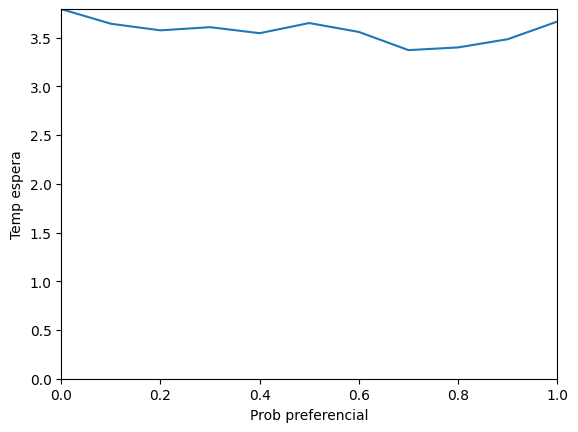

'\ntempo W não altera se tem preferencial,\ntalvez não preferenciais tem tempo maior\n'

In [49]:
def valores_a(valores_p, tentativas_max=10**2, max_n=10**3):
    vs = ([], [])

    for single_p in valores_p:
        media = np.mean([tempo_espera(single_p, tentativas_max) for i in range(max_n)])
        vs[0].append(single_p)
        vs[1].append(media)

    return vs[0], vs[1]


valores_p = np.around(np.linspace(0, 1, 11).astype(float), 2).tolist()

xs, ys = valores_a(valores_p=valores_p)

fig, ax = plt.subplots()
ax.plot(xs, ys)
plt.xlabel("Prob preferencial")
plt.ylabel("Temp espera")
ax.set(xlim=(min(xs), max(xs)), ylim=(0, max(ys)))
plt.show()

"""
tempo W não altera se tem preferencial,
talvez não preferenciais tem tempo maior
""" 


### B

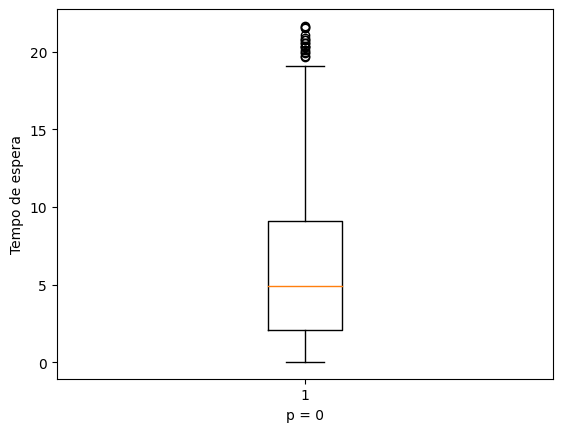

In [68]:
def valores_b(lim, tent_max=10**3):
    _, diferencas = b(1, 1.2, lim, tent_max)

    return list(map(lambda v: abs(v[2] - v[1]), diferencas))


p = 0
fig, ax = plt.subplots()
ax.boxplot(valores_b(p))
plt.xlabel(f"p = {p}")
plt.ylabel("Tempo de espera")
plt.show()


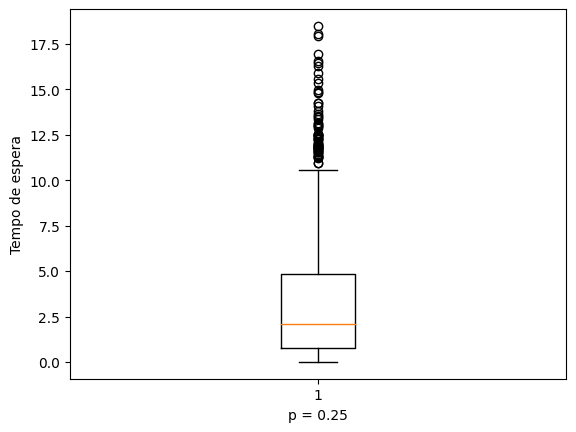

In [67]:
p = 0.25
fig, ax = plt.subplots()
ax.boxplot(valores_b(p))
plt.xlabel(f"p = {p}")
plt.ylabel("Tempo de espera")
plt.show()

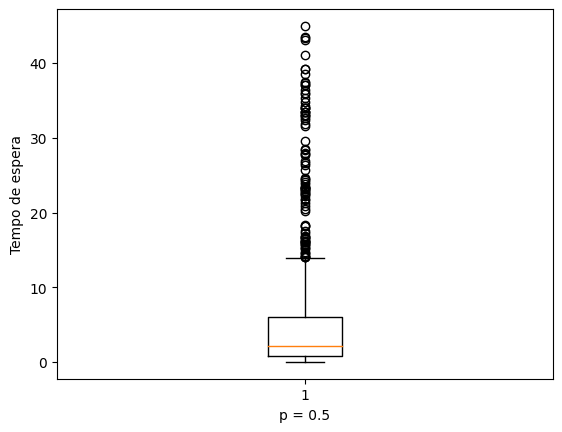

In [65]:
p = 0.5
fig, ax = plt.subplots()
ax.boxplot(valores_b(p))
plt.xlabel(f"p = {p}")
plt.ylabel("Tempo de espera")
plt.show()

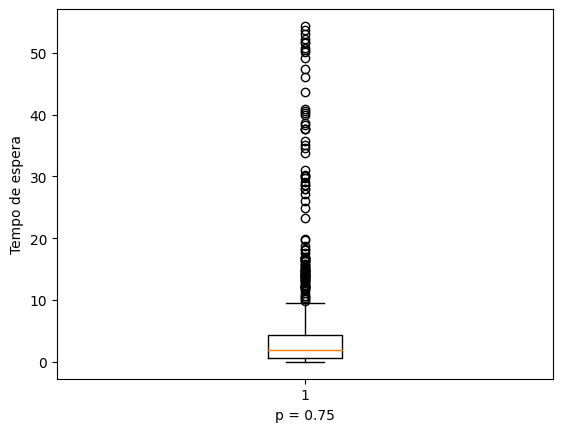

In [64]:
p = 0.75
fig, ax = plt.subplots()
ax.boxplot(valores_b(p))
plt.xlabel(f"p = {p}")
plt.ylabel("Tempo de espera")
plt.show()

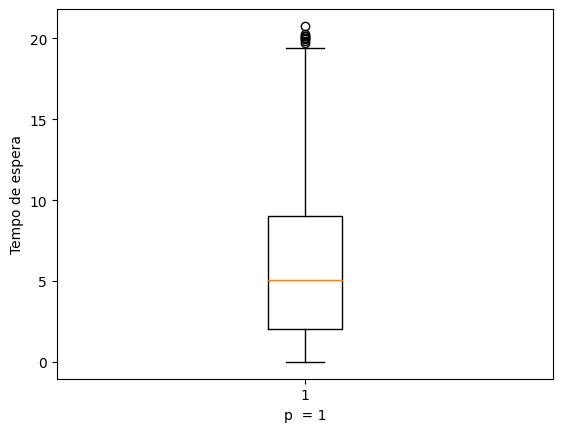

'\nInteressante pensar que a média de espera muda \nem relação à probabilidade do preferencial (lim),\nporem quando p = 1 e p = 0, o comportamento é similar\n\n'

In [63]:
p = 1
fig, ax = plt.subplots()
ax.boxplot(valores_b(p))
plt.xlabel(f"p  = {p}")
plt.ylabel("Tempo de espera")
plt.show()

"""
Interessante pensar que a média de espera muda 
em relação à probabilidade do preferencial (lim),
porem quando p = 1 e p = 0, o comportamento é similar

"""

## Exercício 4

### MM1

In [88]:
import random
def double_queue_mmi1(lambd=1, mi=1.2, tentativas_max=10**2):
    f_1 = []
    f_2 = []
    
    diferencas = []
    
    tempos_f1 = [0] # lista de tempos dos eventos da f_1
    tempos_f2 = [0] # lista de tempos dos eventos da f_2
    
    lista1 = lambd
    lista2 = lambd
    mi1 = mi
    mi2 = mi
    
    while tempos_f1[-1] < tentativas_max or tempos_f2[-1] < tentativas_max:
        
        
        escolhas = ['lista1', 'mi1', 'lista2', 'mi2']
        pesos = np.array([lista1, lista2, (len(f_1) != 0) * mi1, (len(f_2) != 0) * mi2])
        pesos = list(pesos / np.sum(pesos))
        escolha = random.choices(escolhas, pesos)[0]
        
        
        if escolha == 'lista1':
            T = tempos_f1
            tempo_chegada = np.random.exponential(1/lista1)
            tempo_atual = T[-1] + tempo_chegada
            
            f_1.append(tempo_atual)
            tempos_f1.append(tempo_atual)
        
        elif escolha == 'lista2':
            T = tempos_f2
            tempo_chegada = np.random.exponential(1/lista2)
            tempo_atual = T[-1] + tempo_chegada
            
            f_2.append(tempo_atual)
            tempos_f2.append(tempo_atual)
            
        elif escolha == 'mi1':
            T = tempos_f1
            
            if len(f_1) != 0:
                tempo_atendimento = np.random.exponential(1/mi1)
                tempo_atual = T[-1] + tempo_atendimento
                entrada = f_1.pop(0)
                diferencas.append(('fila1', entrada, tempo_atendimento, tempo_atual))
            
            else:
                tempo_atual = T[-1]
            
        
        else:
            T = tempos_f2
            
            if len(f_2) != 0:
                tempo_atendimento = np.random.exponential(1/mi2)
                tempo_atual = T[-1] + tempo_atendimento
                entrada = f_2.pop(0)
                diferencas.append(('fila2', entrada, tempo_atendimento, tempo_atual))
            
            else:
                tempo_atual = T[-1]
            
        if T[-1] != tempo_atual:
            T.append(tempo_atual)
        
    return tempos_f1, tempos_f2, diferencas

tentativas_max = 10**4
tempos_f1, tempos_f2, diferencas = double_queue_mmi1(tentativas_max = tentativas_max)
diferencas

[('fila2', 0.7827663708800712, 0.8946673711312159, 2.575087651866053),
 ('fila1', 0.30214767615409654, 1.180937184486528, 1.4830848606406244),
 ('fila2', 1.6804202807348372, 1.0203421553291983, 3.5954298071952513),
 ('fila1', 1.5146980829934558, 0.03177815597522461, 1.5464762389686804),
 ('fila2', 5.307245061543494, 0.21458045732282202, 5.62212303586625),
 ('fila2', 5.407542578543428, 1.3604531315661081, 6.982576167432358),
 ('fila1', 2.7960248727971693, 0.11121912246197306, 6.177651299606525),
 ('fila2', 8.026863687879084, 1.8829453040747888, 9.909808991953874),
 ('fila1', 6.066432177144552, 5.099397172751944, 11.940104488670004),
 ('fila2', 10.450103319929505, 0.3543741424032534, 14.475732578626918),
 ('fila2', 11.0085294882033, 0.9359847513290511, 15.41171732995597),
 ('fila2', 11.319396488396714, 0.5340930632222501, 15.94581039317822),
 ('fila2', 13.321736430752908, 0.028950800115078407, 18.732393905685925),
 ('fila1', 6.84070731591806, 1.9669663960791473, 14.44156216556412),
 ('fi

In [91]:
# atendente 1 ocioso (quantidades)
ocioso_at1 = list(filter(lambda e: e[0] == 'fila1', diferencas))
# atendente 1 ocupado (quantidades)
ocioso_at1 = list(map(lambda e: e[2], ocioso_at1))
ocioso_at1 = sum(ocioso_at1)
print(f"Atendente 1 ficou {tentativas_max - ocioso_at1} segundos ocioso!")

Atendente 1 ficou 5497.305398132903 segundos ocioso!


In [92]:
# atendente 2 ocioso (quantidades)

ocioso_at2 = list(filter(lambda e: e[0] == 'fila2', diferencas))
# atendente 2 ocupado (quantidades)
ocioso_at2 = list(map(lambda e: e[2], ocioso_at2))
ocioso_at2 = sum(ocioso_at2)
print(f"Atendente 2 ficou {tentativas_max - ocioso_at2} segundos ocioso!")

Atendente 2 ficou 4498.738988707563 segundos ocioso!


### MM2

In [103]:
def queue_mmi2(lambd=1, mi=1.2, tentativas_max=10**2):
    # na fila_entrada (tempos de entrada)
    fila_entrada = []

    # tempo de espera (atendente, tempo_entrada, intervalo_servico, tempo_saida)
    diferencas = []

    tempos = [0]  # lista de tempos da entrada da fila_entrada

    l = lambd
    m1 = mi
    m2 = mi

    while tempos[-1] < tentativas_max:

        esc = ['l', 'm1', 'm2']
        p = np.array([l, (len(fila_entrada) != 0) * m1, (len(fila_entrada) != 0) * m2])
        p = list(p / np.sum(p))
        e = random.choices(esc, p)[0]


        if e == 'l':
            t_chegada = np.random.exponential(1/l)
            t_atual = tempos[-1] + t_chegada

            fila_entrada.append(t_atual)
            tempos.append(t_atual)

        elif e == 'm1':

            if len(fila_entrada) != 0:
                t_atend = np.random.exponential(1/m1)
                t_atual = tempos[-1] + t_atend
                entrada = fila_entrada.pop(0)
                diferencas.append(('a1', entrada, t_atend, t_atual))

            else:
                t_atual = tempos[-1]

        else:

            if len(fila_entrada) != 0:
                t_atend = np.random.exponential(1/m2)
                t_atual = tempos[-1] + t_atend
                entrada = fila_entrada.pop(0)
                diferencas.append(('a2', entrada, t_atend, t_atual))

            else:
                t_atual = tempos[-1]

        if tempos[-1] != t_atual:
            tempos.append(t_atual)

    return tempos, diferencas


tentativas_max = 10**4
t, diferencas = queue_mmi2(tentativas_max=tentativas_max)
diferencas

[('a1', 1.7627642599810416, 2.000573948219261, 3.7633382082003024),
 ('a1', 6.04232076059262, 1.169861768213252, 7.303862279568851),
 ('a2', 6.134000511355599, 0.11140542576763018, 7.415267705336482),
 ('a2', 9.628503517392767, 0.24249186933895536, 10.032013617634691),
 ('a2', 9.789521748295735, 0.8370336421560104, 10.869047259790701),
 ('a1', 11.604543825423246, 0.5160846315536486, 12.120628456976894),
 ('a1', 12.766834809305662, 1.813518973174525, 14.580353782480186),
 ('a2', 14.977561761835855, 0.3781439571966742, 15.652200404167484),
 ('a2', 15.27405644697081, 0.3424611294857404, 16.393814185563375),
 ('a2', 16.051353056077634, 1.652553653181022, 18.0463678387444),
 ('a1', 19.85251747052161, 0.09323388735334034, 20.164066944331626),
 ('a2', 20.069312220411497, 0.9265971848955074, 22.490230752086774),
 ('a2', 20.070833056978287, 0.07049383974460635, 22.56072459183138),
 ('a2', 21.563633567191268, 1.0414420950599084, 23.602166686891287),
 ('a2', 23.925292537799777, 0.316503011352366,

In [104]:
# atendente 1 ocioso (quantidades)

ocioso_at1 = list(filter(lambda e: e[0] == 'a1', diferencas))
ocioso_at1 = list(map(lambda e: e[2], ocioso_at1))
ocioso_at1 = sum(ocioso_at1)
print(f"Atendente 1 ficou {tentativas_max - ocioso_at1} segundos ocioso!")

Atendente 1 ficou 7682.8839271493125 segundos ocioso!


In [105]:
# atendente 2 ocioso

ocioso_at2 = list(filter(lambda e: e[0] == 'a2', diferencas))
ocioso_at2 = list(map(lambda e: e[2], ocioso_at2))
ocioso_at2 = sum(ocioso_at2)
print(f"Atendente 2 ficou {tentativas_max - ocioso_at2} segundos ocioso!")

Atendente 2 ficou 7720.236691260181 segundos ocioso!
